# Sentiment Analysis con KNN
## Clasificador en C++ 💪💪
Vamos a probar a nuestro bichito


Definir los path al ejecutable de python 3.6 y sus librerías,
de acuerdo al virtual env que estén corriendo.

In [7]:
!cd .. && git submodule init
!cd .. && git submodule update
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: cannot create directory ‘build’: File exists
-- The C compiler identification is GNU 7.4.0
-- The CXX compiler identification is GNU 7.4.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /home/tejo240/.pyenv/versions/3.6.5/bin/python (found version "3.6.5") 
-- Found PythonLibs: /home/tejo240/.pyenv/versions/3.6.5/lib/libpython3.6m.a
-- pybind11 v2.3.dev0
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
CMAKE_INSTALL_PREFIX=/home/tejo240/Documents/Facultad/Métodos Numé

In [28]:
# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python --version
import sentiment


/home/tejo240/Documents/Facultad/Métodos Numéricos/metnum-tp2-20191c/notebooks
Python 3.6.5


In [3]:
%load_ext autoreload
%autoreload 2
import pandas as pd

!cd ../data && tar -xvf *.tgz

df = pd.read_csv("../data/imdb_small.csv", index_col=0)

print("Cantidad de documentos: {}".format(df.shape[0]))

tar: *.tgz: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now
Cantidad de documentos: 12500


In [3]:
df.describe()

,type,review,label,file
count,12500,12500,12500,12500
unique,2,12469,2,12085
top,test,"I have always been a fan of Bottom, grabbing a...",neg,3095_10.txt
freq,6275,2,6322,2


In [4]:
text_train = df[df.type == 'train']["review"]
label_train = df[df.type == 'train']["label"]

text_test = df[df.type == 'test']["review"]
label_test = df[df.type == 'test']["label"]

print("Cantidad de instancias de entrenamiento = {}".format(len(text_train)))
print("Cantidad de instancias de test = {}".format(len(text_test)))


Cantidad de instancias de entrenamiento = 6225
Cantidad de instancias de test = 6275


In [8]:
#All in one. Thuis cell defines the tester functions.
import time
from sklearn.feature_extraction.text import CountVectorizer
def test(max_alpha_, min_alpha_, alpha_step_, max_df_=0.90, min_df_=0.01, max_features_=5000, knn_neighbours_=100, log=False):
    vectorizer = CountVectorizer(max_df=max_df_, min_df=min_df_, max_features=max_features_)
    vectorizer.fit(text_train)

    X_train, y_train = vectorizer.transform(text_train), (label_train == 'pos').values
    X_test, y_test = vectorizer.transform(text_test), (label_test == 'pos').values

    import sentiment

    clf = sentiment.KNNClassifier(knn_neighbours_)
    pca = sentiment.PCA(max_alpha_)
    #fitteo con el x_train calculado arriba
    pca.fit(X_train,10000, 0.0000000001)
    #loopeo para todos los alphas
    for alpha_ in range(min_alpha_, max_alpha_, alpha_step_):
        pca_X_train = pca.transform(X_train, alpha_)
        pca_X_test = pca.transform(X_test,alpha_)

        #Timing starts, same as previous cell:
        start = time.time()

        clf.fit(pca_X_train, y_train)
        from sklearn.metrics import accuracy_score
        from sklearn.metrics import precision_score
        from sklearn.metrics import recall_score

        y_pred = clf.predict(pca_X_test)

        acc = accuracy_score(y_test, y_pred)
        pre = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = 2*(pre*rec)/(pre+rec)
        #Timing ends, again, like in previous cell.
        end = time.time()
        delta_time = end - start
        delta_time_str = str(round(delta_time, 2))
        if log:
            comma = ", "
            f = open("../data/test_results/out.csv","a+")
            f.write("\n")
            f.write(str(round(acc,2)) + comma)
            f.write(str(round(pre,2)) + comma)
            f.write(str(round(rec,2)) + comma)
            f.write(delta_time_str + comma)
            f.write(str(round(max_df_,2)) + comma)
            f.write(str(round(min_df_,2)) + comma)
            f.write(str(round(max_features_,2)) + comma)
            f.write(str(round(knn_neighbours_,2)) + comma)
            f.write(str(round(alpha_,2))+ comma)
            f.write(str(round(f1,2)))
            f.close()

    return f1


In [10]:
#Actual testing, this cell runs the tester functions and logs or prints results.
#It may take a long time to run.
import numpy as np
#OJO, puse esto en true para testear
test_individually = False
if test_individually:
    test(max_alpha_=11, min_alpha_= 10, alpha_step_=2,max_df_=0.90, min_df_=0.01, max_features_=5000, knn_neighbours_=10,log=True)
else:
    max_alpha = 51
    min_alpha = 50
    alpha_step = 10
    max_features = 5000
    knn_neighbours = 50
    for min_df in np.arange(0.49, 0.5,0.03):
        for max_df in np.arange(0.49, 0.99,0.03):
            test(max_alpha_= max_alpha, min_alpha_= min_alpha, alpha_step_=alpha_step,max_df_= max_df, min_df_= min_df, max_features_=max_features, knn_neighbours_=knn_neighbours,log=True)


In [41]:
print("hola")

hola


In [47]:
def gradient_descent(pca, p0, start_value, max_iters, debug = False):
    
    old_val = start_value
    p1 = [p0[0], p0[1], p0[2], p0[3], p0[4]]
    aggr = 1
    aggr_max = 3
    log = True

    while True:
        
        p0 = p1
        print("Current vector: " + str(p0))
        
        step0 = aggr*p0[0]*0.05#0.03
        step1 = aggr*p0[1]*0.05 #0.03
        step2 = int(aggr*p0[2]*0.5) #1000
        step3 = int(aggr*p0[3]*0.5) #10
        step4 = int(aggr*p0[4]*0.5) #100

        changed = False
        
        if max_iters == 0:
            print("Ending descent due to max_iters")
            break
        max_iters -= 1
        
        next_val = test(pca, max(0,p0[0]+step0), p0[1], p0[2], p0[3], p0[4], log)
        if next_val > old_val:
            p1 = [p0[0]+step0, p0[1], p0[2], p0[3], p0[4]]
            old_val = next_val
            changed = True

        next_val = test(pca, max(0,p0[0]-step0), p0[1], p0[2], p0[3], p0[4], log)
        if next_val > old_val:
            p1 = [p0[0]-step0, p0[1], p0[2], p0[3], p0[4]]
            old_val = next_val
            changed = True

        next_val = test(pca, p0[0], max(0,p0[1]+step1), p0[2], p0[3], p0[4], log)
        if next_val > old_val:
            p1 = [p0[0], p0[1]+step1, p0[2], p0[3], p0[4]]
            old_val = next_val
            changed = True
            
        next_val = test(pca, p0[0], max(0,p0[1]-step1), p0[2], p0[3], p0[4], log)
        if next_val > old_val:
            p1 = [p0[0], p0[1]-step1, p0[2], p0[3], p0[4]]
            old_val = next_val
            changed = True
        
        next_val = test(pca, p0[0], p0[1], max(3,p0[2]+step2), p0[3], p0[4], log)
        if next_val > old_val:
            p1 = [p0[0], p0[1], p0[2]+step2, p0[3], p0[4]]
            old_val = next_val
            changed = True
            
        next_val = test(pca, p0[0], p0[1], max(3,p0[2]-step2), p0[3], p0[4], log)
        if next_val > old_val:
            p1 = [p0[0], p0[1], p0[2]-step2, p0[3], p0[4]]
            old_val = next_val
            changed = True

        next_val = test(pca, p0[0], p0[1], p0[2], max(3,p0[3]+step3), p0[4], log)
        if next_val > old_val:
            p1 = [p0[0], p0[1], p0[2], p0[3]+step3, p0[4]]
            old_val = next_val
            changed = True
            
        next_val = test(pca, p0[0], p0[1], p0[2], max(3,p0[3]-step3), p0[4], log)
        if next_val > old_val:
            p1 = [p0[0], p0[1], p0[2], p0[3]-step3, p0[4]]
            old_val = next_val
            changed = True

        next_val = test(pca, p0[0], p0[1], p0[2], p0[3], max(3,p0[4]+step4), log)
        if next_val > old_val:
            p1 = [p0[0], p0[1], p0[2], p0[3], p0[4]+step4]
            old_val = next_val
            changed = True

        next_val = test(pca, p0[0], p0[1], p0[2], p0[3], max(3,p0[4]-step4), log)
        if next_val > old_val:
            p1 = [p0[0], p0[1], p0[2], p0[3], p0[4]-step4]
            old_val = next_val
            changed = True

        if not changed:
            aggr *= 1.15
            if debug:
                print("Local maximum found (" + str(old_val) + "), rising aggressiveness to: "+ str(aggr))
                print("Argument vector: " + str(p1))
            if aggr > aggr_max:
                aggr = 1
                print("Aggressiveness got to high, resetting to one.")
            
        if debug and changed:
            print("Found a better value: " + str(old_val))
            print("New argument vector: " + str(p1) + "\n")
            
        
p0 = [0.90, 0.01,3000, 20, 30]
p0 = [0.9, 0.01, 3000, 165, 275]
p0 = [0.9, 0.01, 1500, 124, 618]
v0 = test(pca, p0[0], p0[1], p0[2], p0[3], p0[4], log=True)
gradient_descent(pca, p0, v0, max_iters = 1000000, debug = True)


Current vector: [0.9, 0.01, 3000, 165, 275]
Found a better value: 0.68652522130111
New argument vector: [0.9, 0.01, 1500, 165, 275]

Current vector: [0.9, 0.01, 1500, 165, 275]
Found a better value: 0.7004207954391203
New argument vector: [0.9, 0.01, 1500, 165, 412]

Current vector: [0.9, 0.01, 1500, 165, 412]
Found a better value: 0.7096691129136089
New argument vector: [0.9, 0.01, 1500, 165, 618]

Current vector: [0.9, 0.01, 1500, 165, 618]
Found a better value: 0.7109102646868949
New argument vector: [0.9, 0.01, 1500, 83, 618]

Current vector: [0.9, 0.01, 1500, 83, 618]
Found a better value: 0.7128278000258365
New argument vector: [0.9, 0.01, 1500, 124, 618]

Current vector: [0.9, 0.01, 1500, 124, 618]
Local maximum found (0.7128278000258365), rising aggressiveness to: 1.15
Argument vector: [0.9, 0.01, 1500, 124, 618]
Current vector: [0.9, 0.01, 1500, 124, 618]


KeyboardInterrupt: 

In [47]:
#GRAFICADOR
def common_graph(csv, x, y):
    import numpy as np
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    df = pd.read_csv(csv)
    plot = sns.lineplot(x=x, y=y, data=df);
    plot.legend([x, y]);
    
def heatmap_graph(csv, x, y, z):
    import numpy as np
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    
     
    df = pd.read_csv(csv)
    df = df.pivot(index=x, columns=y, values=z)
    plot = sns.heatmap(df)
    plot.legend([x, y]);



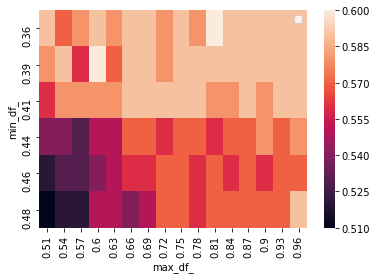

In [48]:
#common_graph('../data/test_results/out_test_features_s.csv', "acc", " max_features_")
heatmap_graph('../data/test_results/out_test_min_max_s.csv', "min_df_", "max_df_", "acc")

In [19]:
#Checkeo de PCA.fit en python. Deberia dar muy similar a C++, salvo por errores de rendodeo.
#Revisar los au
import numpy as np

X = np.array([[2,429,608,192],[173,746,800,125],[14,225,6,9]]) 
print(X.shape)
#X = np.array([[1,2,3,4],[105,107,113,125],[14,225,6,9],[17,23,15,94],[1784,12,19,135]]) 
mu = X.sum(axis = 0)
mu = mu/X.shape[0]
#M = (X - X.mean(axis=0))
M = (X - mu) / np.sqrt(X.shape[0]-1)
cov_matrix = M.T @ M  
print(cov_matrix)
w, V = np.linalg.eig(cov_matrix)

# A veces aparecen números complejos acá. Los descartamos
w = np.real(w)
V = np.real(V)
print(V)
print(w)

(3, 4)
[[  9111.          22433.          25309.            798.5       ]
 [ 22433.          68924.33333333  99557.66666667  12754.83333333]
 [ 25309.          99557.66666667 171617.33333333  31567.66666667]
 [   798.5         12754.83333333  31567.66666667   8572.33333333]]
[[ 0.14059445  0.51524127  0.83783397  0.27741273]
 [ 0.51014667  0.60482284 -0.39447156 -0.53635408]
 [ 0.83662887 -0.37451917  0.03618136  0.3973405 ]
 [ 0.14154756 -0.47796565  0.37565588 -0.69100434]]
[ 2.41918091e+05  1.63069093e+04 -5.40693656e-12  8.22213615e-12]
